In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from PIL import Image
from wordcloud import WordCloud, STOPWORDS
import folium
from folium import plugins

# Read CSV Data

Menggunakan data London Crime by LSOA

In [2]:
#read data
df_london = pd.read_csv('london_crime_by_lsoa.csv')
df_london

,lsoa_code,borough,major_category,minor_category,value,year,month
0,E01001116,Croydon,Burglary,Burglary in Other Buildings,0,2016,11
1,E01001646,Greenwich,Violence Against the Person,Other violence,0,2016,11
2,E01000677,Bromley,Violence Against the Person,Other violence,0,2015,5
3,E01003774,Redbridge,Burglary,Burglary in Other Buildings,0,2016,3
4,E01004563,Wandsworth,Robbery,Personal Property,0,2008,6
...,...,...,...,...,...,...,...
13490599,E01000504,Brent,Criminal Damage,Criminal Damage To Dwelling,0,2015,2
13490600,E01002504,Hillingdon,Robbery,Personal Property,1,2015,6
13490601,E01004165,Sutton,Burglary,Burglary in a Dwelling,0,2011,2
13490602,E01001134,Croydon,Robbery,Business Property,0,2011,5


# Explore Data

In [3]:
#Sort data by year
df_london.sort_values(by='year', ascending=True, axis=0, inplace=True)

In [4]:
condition = df_london['value'] >= 1
print(condition)

12504370    False
5807276     False
5807272     False
8512153     False
5807264     False
            ...  
6171475      True
6171480     False
11948556    False
6171412     False
0           False
Name: value, Length: 13490604, dtype: bool


In [5]:
df_london = df_london[condition]
df_london

,lsoa_code,borough,major_category,minor_category,value,year,month
1315511,E01004204,Tower Hamlets,Violence Against the Person,Common Assault,2,2008,9
2874646,E01003986,Southwark,Robbery,Business Property,1,2008,7
8512166,E01000928,Camden,Criminal Damage,Other Criminal Damage,1,2008,9
8512169,E01002676,Hounslow,Drugs,Possession Of Drugs,2,2008,9
5807242,E01002999,Kingston upon Thames,Theft and Handling,Other Theft,2,2008,11
...,...,...,...,...,...,...,...
6171393,E01000439,Bexley,Theft and Handling,Theft/Taking of Pedal Cycle,1,2016,12
6171437,E01000108,Barking and Dagenham,Burglary,Burglary in a Dwelling,3,2016,1
6171449,E01001915,Hammersmith and Fulham,Drugs,Possession Of Drugs,3,2016,5
11948567,E01002406,Hillingdon,Theft and Handling,Motor Vehicle Interference & Tampering,5,2016,12


In [6]:
# Mengelompokkan data sesuai wilayah dengan jumlah kejahatan pada bulan tertentu
df_london.groupby("borough", sort=True)["value"].sum().sort_values(ascending=True)

borough
City of London               780
Kingston upon Thames       89306
Richmond upon Thames       96771
Sutton                    100987
Bexley                    114136
Merton                    115654
Harrow                    116848
Havering                  138947
Barking and Dagenham      149447
Kensington and Chelsea    171981
Greenwich                 181568
Redbridge                 183562
Bromley                   184349
Hammersmith and Fulham    185259
Hounslow                  186772
Enfield                   193880
Waltham Forest            203879
Wandsworth                204741
Hillingdon                209680
Barnet                    212191
Haringey                  213272
Lewisham                  215137
Hackney                   217119
Brent                     227551
Tower Hamlets             228613
Islington                 230286
Ealing                    251562
Croydon                   260294
Newham                    262024
Camden                    275147
So

# Data Visualization

### Area Plot

Pada tahun berapakah jumlah kejahatan terbesar yang terjadi di seluruh wilayah London ?

In [7]:
#Menampilkan jumlah kejahatan berdasarkan per tahun dalam bentuk tabel
year = df_london.pivot_table(values='value', index=['year'], aggfunc=np.sum, fill_value=0)
year

,value
year,
2008,738641
2009,717214
2010,715324
2011,724915
2012,737329
2013,686407
2014,680183
2015,711624
2016,736121


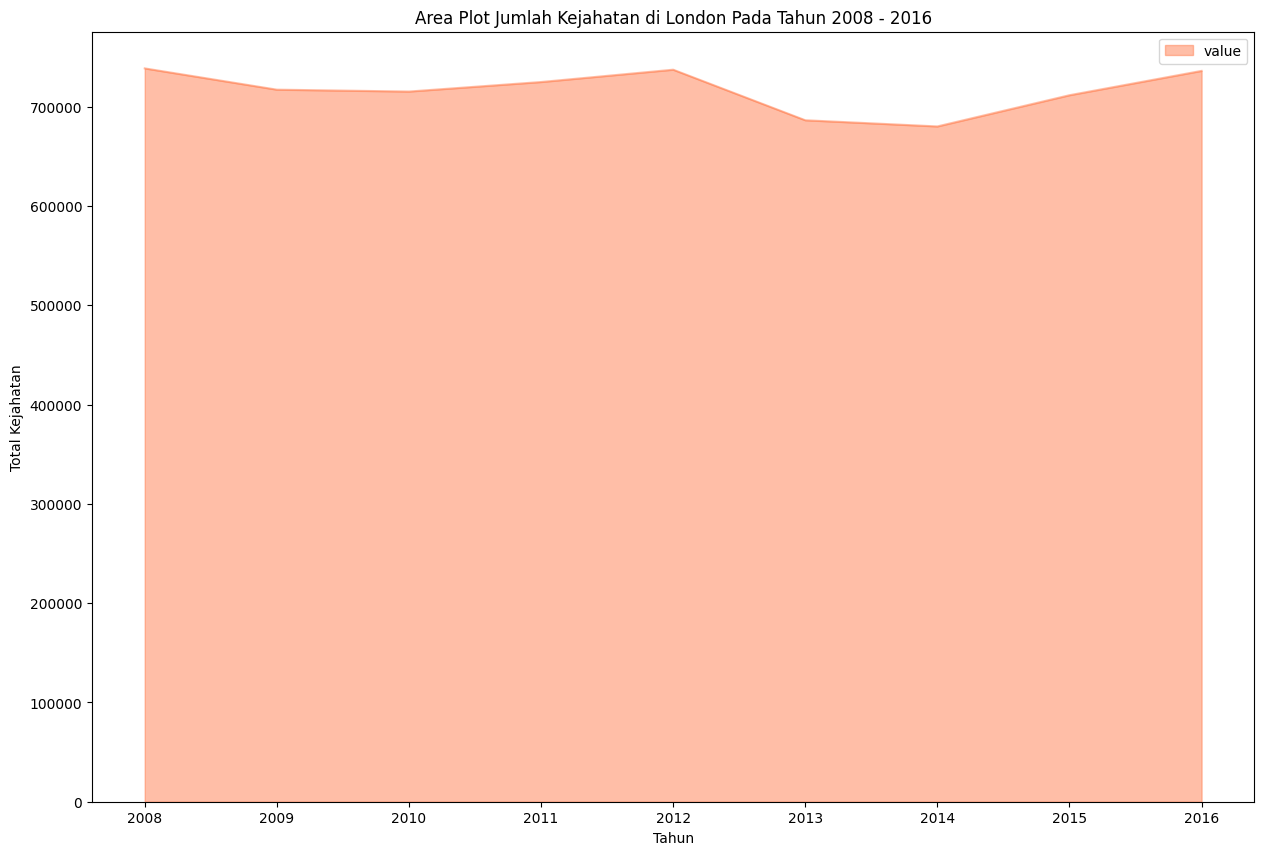

In [8]:
year.plot(kind='area',
           stacked=False,
           figsize=(15, 10),
           color='coral'
          )

plt.title('Area Plot Jumlah Kejahatan di London Pada Tahun 2008 - 2016')
plt.ylabel('Total Kejahatan') 
plt.xlabel('Tahun') 

plt.show()

Dari grafik area plot yang ada diatas dapat menunjukkan bahwa jumlah kejahatan di London tertinggi ada pada tahun 2008 dengan jumlah kejahatan sebesar 738641 kasus kejahatan yang telah dilaporkan. Sedangkan, dari tahun ke tahun kasus kejahatan yang terjadi di Wilayah London cenderung tinggi dengan range kejahatan di angka 680000 hingga 740000 kasus kejahatan.

### Histogram

Apa kejahatan kategori utama yang banyak dilaporkan oleh penduduk london pada tahun 2008 - 2016?

Text(0, 0.5, 'Jumlah Laporan')

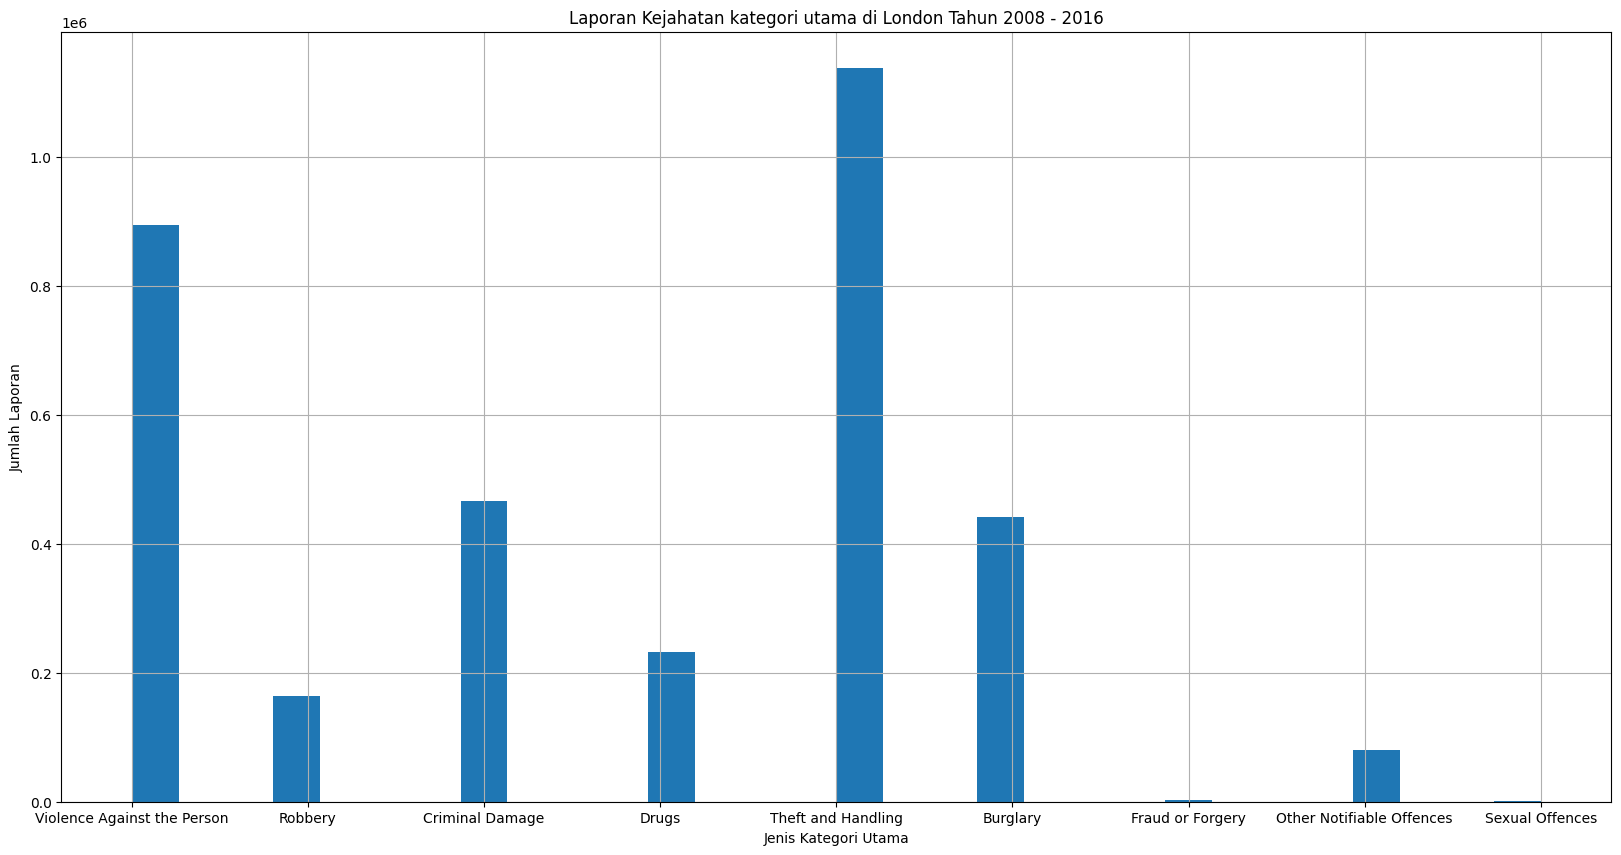

In [9]:
df_london.major_category.hist(bins=30, 
                              figsize=(20, 10)
                              )

plt.title('Laporan Kejahatan kategori utama di London Tahun 2008 - 2016')
plt.xlabel('Jenis Kategori Utama')
plt.ylabel('Jumlah Laporan')

Pada histogram diatas menunjukkan bahwa kasus kejahatan kategori utama yang sering terjadi di beberapa Wilayah London adalah Theft and Handling pada urutan pertama dan disusul oleh Violence Against the Person pada urutan kedua.

### Bar Chart

Apa saja jenis kejahatan ringan yang paling banyak dilakukan di london pada tahun 2008 - 2016 ?

Text(0.5, 1.0, 'Jumlah dan Kategori Kejahatan Ringan di London Tahun 2008 - 2016')

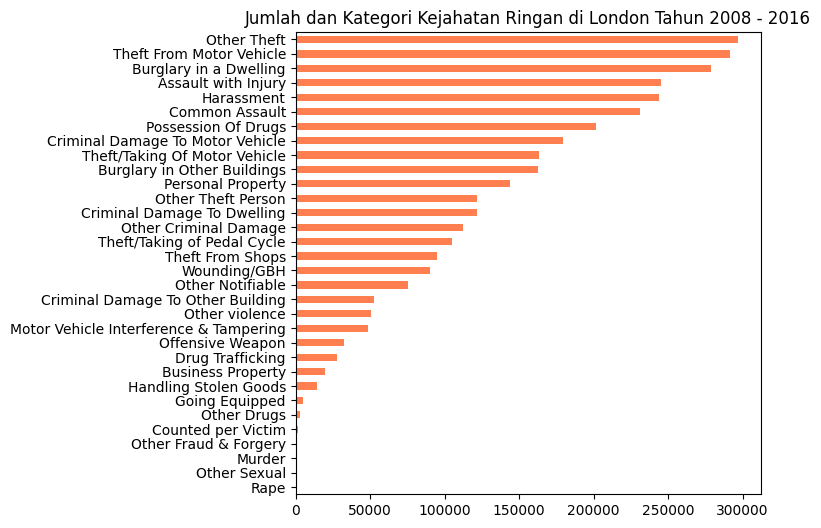

In [10]:
df_london.minor_category.value_counts().sort_values(ascending=True).plot.barh(figsize=(6, 6), 
                                                                             color='coral'
                                                                              )

plt.title("Jumlah dan Kategori Kejahatan Ringan di London Tahun 2008 - 2016")

Dari chart yang telah ditampilkan diatas menunjukkan bahwa kejahatan dalam kategori ringan yang sering dilakukan di wilayah London adalah Other Theft pada urutan pertama, Theft from Motor Vehicle dan Burglary in a Dwelling dengan jumlah kasus kejahatan dengan range 250000 hingga 300000 pada tahun 2008 - 2016.

### Pie Chart

Apa kejahatan utama tertinggi yang terjadi di London pada tahun 2016 dan berapakah presentasenya?

In [11]:
df_london_year = df_london.drop(['month'], axis=1)
df_london_year = df_london[
    (df_london['year'] == 2016)]

df_london_year

,lsoa_code,borough,major_category,minor_category,value,year,month
3165737,E01001964,Haringey,Burglary,Burglary in Other Buildings,1,2016,2
3771766,E01000051,Barking and Dagenham,Violence Against the Person,Common Assault,2,2016,6
485045,E01003574,Newham,Burglary,Burglary in a Dwelling,1,2016,6
60400,E01003755,Redbridge,Theft and Handling,Other Theft,6,2016,7
62224,E01032581,Redbridge,Violence Against the Person,Wounding/GBH,1,2016,7
...,...,...,...,...,...,...,...
6171393,E01000439,Bexley,Theft and Handling,Theft/Taking of Pedal Cycle,1,2016,12
6171437,E01000108,Barking and Dagenham,Burglary,Burglary in a Dwelling,3,2016,1
6171449,E01001915,Hammersmith and Fulham,Drugs,Possession Of Drugs,3,2016,5
11948567,E01002406,Hillingdon,Theft and Handling,Motor Vehicle Interference & Tampering,5,2016,12


In [12]:
df_london_major16 = df_london_year.groupby('major_category',sort=True)['value'].sum().sort_values(ascending=True)
df_london_major16

major_category
Other Notifiable Offences       15809
Robbery                         22528
Drugs                           38914
Criminal Damage                 64071
Burglary                        68285
Violence Against the Person    232381
Theft and Handling             294133
Name: value, dtype: int64

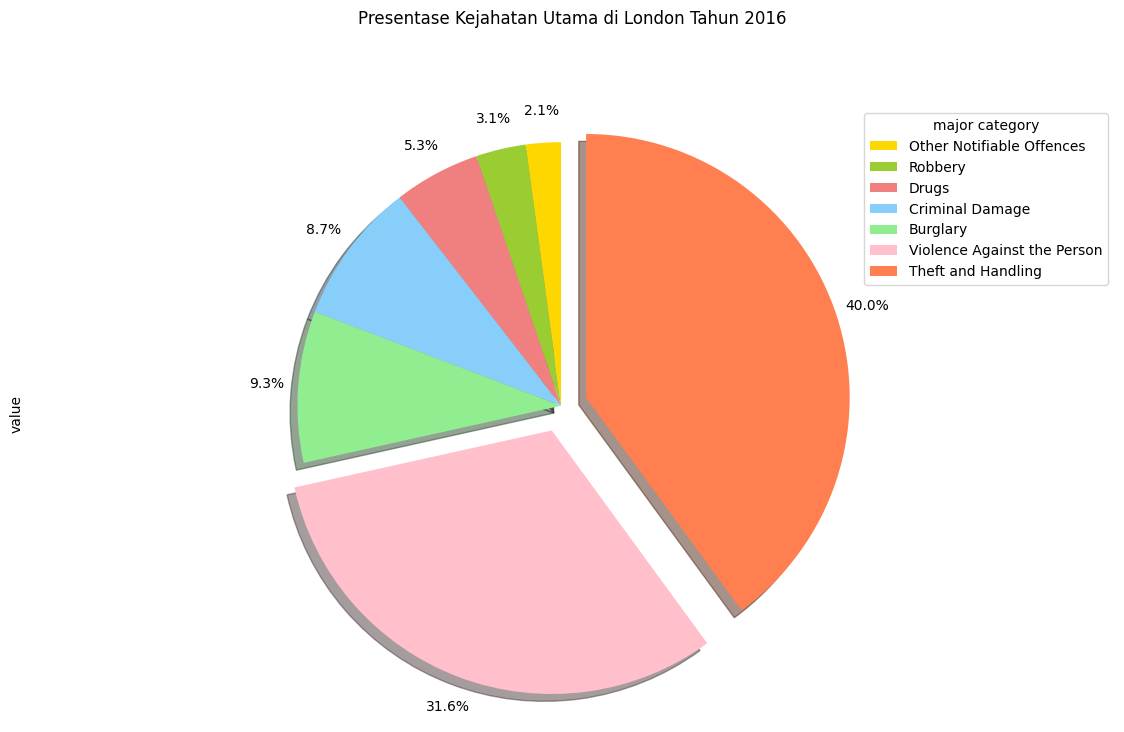

In [13]:
color_list = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'lightgreen', 'pink', 'coral']

explode_list = [0, 0, 0, 0, 0, 0.1, 0.1]

df_london_major16.plot(
                                kind = 'pie',
                                figsize = (14, 8),
                                autopct = '%1.1f%%',
                                startangle = 90,
                                shadow = True,
                                labels = None,
                                colors = color_list,
                                pctdistance = 1.12,      
                                explode = explode_list
                            )

plt.title('Presentase Kejahatan Utama di London Tahun 2016', y=1.12)
plt.axis('equal')

plt.legend(labels=df_london_major16.index, loc='upper right', title='major category')

plt.show()

Dari chart yang telah ditampilkan diatas menunjukkan bahwa kejahatan kategori utama yang tertinggi di wilayah London adalah Theft and Handling dengan presentase 40% dari 100 persen seluruh kejahatan kategori utama yang terjadi di London.

### Box Plot

Apa kejahatan kategori utama terbesar yang ada di WIlayah London sekitar tahun 2008 - 2016 ?

In [14]:
#Membuat dataframe dengan style spreadsheet pivot table
#Menganalisis data kolom major_category
dataMajor = df_london.pivot_table(values="value", index=["year"],columns=["major_category"], aggfunc=np.sum, fill_value=0)
dataMajor

major_category,Burglary,Criminal Damage,Drugs,Fraud or Forgery,Other Notifiable Offences,Robbery,Sexual Offences,Theft and Handling,Violence Against the Person
year,,,,,,,,,
2008,88092,91872,68804,5325,10112,29627,1273,283692,159844
2009,90619,85565,60549,0,10644,29568,0,279492,160777
2010,86826,77897,58674,0,10768,32341,0,290924,157894
2011,93315,70914,57550,0,10264,36679,0,309292,146901
2012,93392,62158,51776,0,10675,35260,0,334054,150014
2013,87222,56206,50278,0,10811,29337,0,306372,146181
2014,76053,59279,44435,0,13037,22150,0,279880,185349
2015,70489,62976,39785,0,14229,21383,0,284022,218740
2016,68285,64071,38914,0,15809,22528,0,294133,232381


Text(0, 0.5, 'Jumlah Kejahatan')

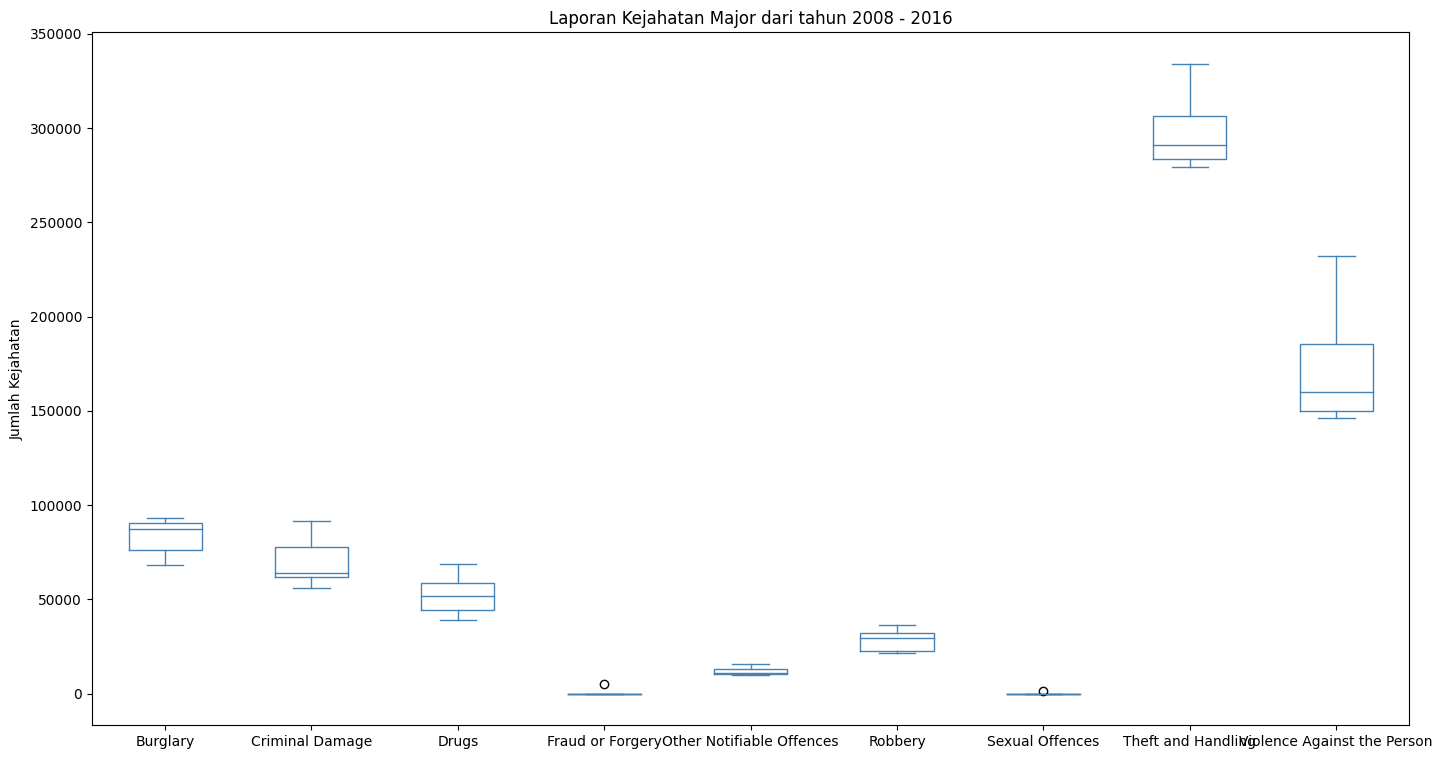

In [15]:
dataMajor.plot.box(figsize=(17, 9), color="steelblue")

plt.title("Laporan Kejahatan Major dari tahun 2008 - 2016")
plt.ylabel("Jumlah Kejahatan")

Dari grafik diatas dapat disimpulkan bahwa kejahatan kategori utama terbesar di London adalah Thwft and Handling.

### Scatter Plot

In [16]:
df_major = df_london.pivot_table(values='value', index=['year'],columns=['major_category'], aggfunc=np.sum, fill_value=0)
df_major

major_category,Burglary,Criminal Damage,Drugs,Fraud or Forgery,Other Notifiable Offences,Robbery,Sexual Offences,Theft and Handling,Violence Against the Person
year,,,,,,,,,
2008,88092,91872,68804,5325,10112,29627,1273,283692,159844
2009,90619,85565,60549,0,10644,29568,0,279492,160777
2010,86826,77897,58674,0,10768,32341,0,290924,157894
2011,93315,70914,57550,0,10264,36679,0,309292,146901
2012,93392,62158,51776,0,10675,35260,0,334054,150014
2013,87222,56206,50278,0,10811,29337,0,306372,146181
2014,76053,59279,44435,0,13037,22150,0,279880,185349
2015,70489,62976,39785,0,14229,21383,0,284022,218740
2016,68285,64071,38914,0,15809,22528,0,294133,232381


In [17]:
df_scatter = df_major[['Theft and Handling','Violence Against the Person']]
df_scatter = df_scatter.reset_index()
df_scatter

major_category,year,Theft and Handling,Violence Against the Person
0,2008,283692,159844
1,2009,279492,160777
2,2010,290924,157894
3,2011,309292,146901
4,2012,334054,150014
5,2013,306372,146181
6,2014,279880,185349
7,2015,284022,218740
8,2016,294133,232381


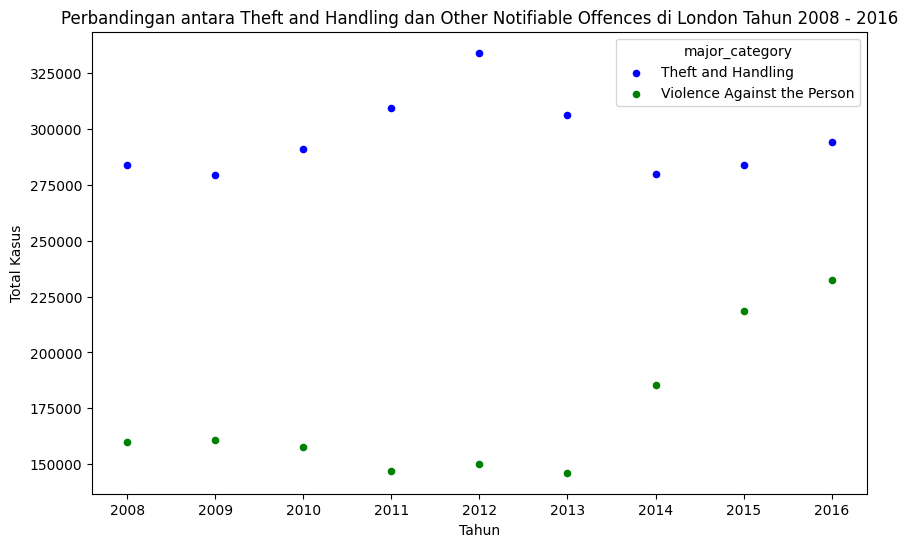

In [18]:
ax1 = df_scatter.plot(kind='scatter', x='year', y='Theft and Handling', figsize=(10, 6), color='blue', label='Theft and Handling')
ax2 = df_scatter.plot(kind='scatter', x='year', y='Violence Against the Person', figsize=(10, 6), color='green',label='Violence Against the Person', ax=ax1 )

plt.title('Perbandingan antara Theft and Handling dan Other Notifiable Offences di London Tahun 2008 - 2016')
plt.xlabel('Tahun')
plt.ylabel('Total Kasus')

plt.show()

Dari data diatas didapatkan kesimpulan bahwa kejahatan 'Theft and Handling' yang merupakan kejahatan paling banyak laporan kasusnya terjadi lebih dari 280000 kasus setiap tahunnya sedangkan kejahatan 'Violence Agains the Person' yang merupakan peringkat dua laporan kasusnya terjadi kurang dari 2500000 kasuh di setiap tahunnya.

### Word Clouds

In [19]:
word_cloud = df_london.copy()
word_cloud = word_cloud.drop(['lsoa_code' ,'value', 'year', 'month'], axis=1)
word_cloud

,borough,major_category,minor_category
1315511,Tower Hamlets,Violence Against the Person,Common Assault
2874646,Southwark,Robbery,Business Property
8512166,Camden,Criminal Damage,Other Criminal Damage
8512169,Hounslow,Drugs,Possession Of Drugs
5807242,Kingston upon Thames,Theft and Handling,Other Theft
...,...,...,...
6171393,Bexley,Theft and Handling,Theft/Taking of Pedal Cycle
6171437,Barking and Dagenham,Burglary,Burglary in a Dwelling
6171449,Hammersmith and Fulham,Drugs,Possession Of Drugs
11948567,Hillingdon,Theft and Handling,Motor Vehicle Interference & Tampering


In [20]:
minor = " ".join(i for i in word_cloud.minor_category)
stopwords = set(STOPWORDS)
wordCloud = WordCloud(stopwords=stopwords, background_color="white").generate(minor)

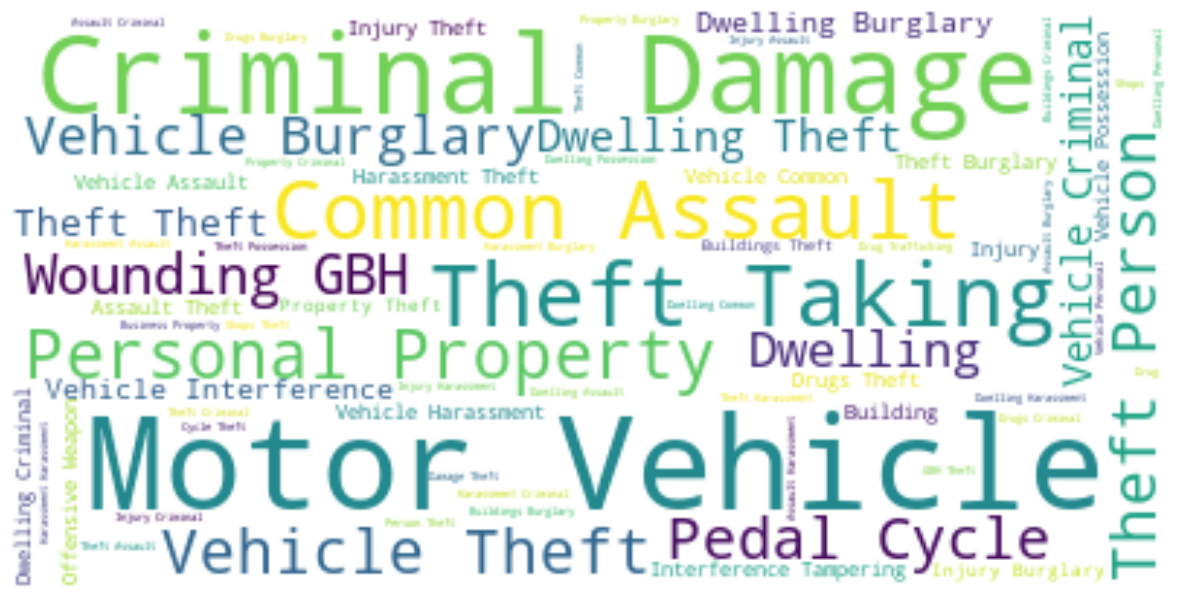

In [21]:
plt.figure(figsize=(15, 10))
plt.imshow(wordCloud, interpolation='bilinear')
plt.axis('off')
plt.show()

### Folium Maps

In [22]:
map_crimes = df_london.copy()
map_crimes

,lsoa_code,borough,major_category,minor_category,value,year,month
1315511,E01004204,Tower Hamlets,Violence Against the Person,Common Assault,2,2008,9
2874646,E01003986,Southwark,Robbery,Business Property,1,2008,7
8512166,E01000928,Camden,Criminal Damage,Other Criminal Damage,1,2008,9
8512169,E01002676,Hounslow,Drugs,Possession Of Drugs,2,2008,9
5807242,E01002999,Kingston upon Thames,Theft and Handling,Other Theft,2,2008,11
...,...,...,...,...,...,...,...
6171393,E01000439,Bexley,Theft and Handling,Theft/Taking of Pedal Cycle,1,2016,12
6171437,E01000108,Barking and Dagenham,Burglary,Burglary in a Dwelling,3,2016,1
6171449,E01001915,Hammersmith and Fulham,Drugs,Possession Of Drugs,3,2016,5
11948567,E01002406,Hillingdon,Theft and Handling,Motor Vehicle Interference & Tampering,5,2016,12


In [23]:
map_crimes = map_crimes.groupby("borough")["value"].sum().sort_values(ascending=False)

In [24]:
map_crimes = pd.DataFrame(map_crimes).reset_index()

In [25]:
top5CrimesMap = map_crimes.head()
top5CrimesMap

,borough,value
0,Westminster,455028
1,Lambeth,292178
2,Southwark,278809
3,Camden,275147
4,Newham,262024


In [26]:
# Longitude
top5CrimesMap.insert(2, 'X', ['-0.135278', '-0.123068', '-0.0833', '-0.140556', '0.035216'])

In [27]:
top5CrimesMap.head()

,borough,value,X
0,Westminster,455028,-0.135278
1,Lambeth,292178,-0.123068
2,Southwark,278809,-0.0833
3,Camden,275147,-0.140556
4,Newham,262024,0.035216


In [28]:
# Latitude
top5CrimesMap.insert(3, 'Y', ['51.494720', '51.457148', '51.4500', '51.536388', '51.525516'])

In [29]:
top5CrimesMap.head()

,borough,value,X,Y
0,Westminster,455028,-0.135278,51.494720
1,Lambeth,292178,-0.123068,51.457148
2,Southwark,278809,-0.0833,51.4500
3,Camden,275147,-0.140556,51.536388
4,Newham,262024,0.035216,51.525516


In [30]:
# create map and display it
london_map = folium.Map(location=[51.509865, -0.118092], zoom_start=12)

# Instantiate a mark cluster object for the incidents in the dataframe
incidents = plugins.MarkerCluster().add_to(london_map)

# Loop through the 100 crimes and add each to the map
for lat, lng, label in zip(top5CrimesMap.Y, top5CrimesMap.X, top5CrimesMap.borough):
        folium.Marker(
            location = [lat, lng],
            icon=None,
            popup = label
    ).add_to(incidents)
    
    
# Display the map
london_map.add_child(incidents)

### Conclusion

Dari beberapa visualisasi data diatas dapat ditarik beberapa kesimpulan :
1. Kasus kejahatan kategori utama maupun ringan yang terjadi di London dapat dikategorikan tinggi dengan jumlah kejahatan kurang lebih 700000 kasus yang dilaporkan per tahunnya.
2. Wilayah dengan total kejahatan terbesar dari tahun 2008 - 2016 adalah Wilayah Westminster.
3. Kasus kejahatan kategori utama (major) tertinggi adalah Theft and Handling, dan untuk kasus kejahatan kategory utama (minor) adalah Other Theft.